In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

from transformers import AutoModel, AutoModelForCausalLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_cmap = plt.get_cmap('Blues')
navy_colors = [
    (0.968627, 0.984314, 1.000000),
    (0.870588, 0.921569, 0.968627), 
    (0.776471, 0.858824, 0.937255),
    (0.619608, 0.792157, 0.882353),
    (0.419608, 0.682353, 0.839216),
    (0.258824, 0.572549, 0.776471),
    (0.129412, 0.443137, 0.709804),
    (0.031373, 0.317647, 0.611765),
    (0, 0, 0.501960),  
    (0, 0, 0.4),       
    (0, 0, 0.3)     
]
navy_cmap = LinearSegmentedColormap.from_list('NavyBlues', navy_colors)

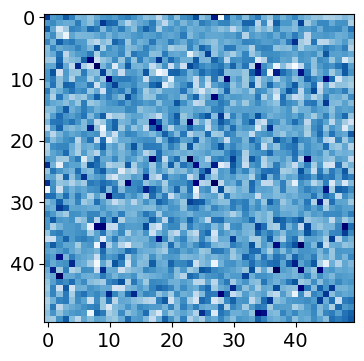

In [12]:
'BERT tiny (l = 2, d = 128, h = 2 ; 4.40M parameters)'
model = AutoModel.from_pretrained("google/bert_uncased_L-2_H-128_A-2")

layer = 1

Wq = model.encoder.layer[layer].attention.self.query.weight.T.detach().numpy()
Wk = model.encoder.layer[layer].attention.self.key.weight.T.detach().numpy()
M = Wq @ Wk.T

plt.figure(figsize=(4,4))
plt.imshow(M[ : 50, : 50], aspect = 'auto', cmap = navy_cmap)
plt.savefig('figures/fig-matrix-encoder-only.pdf', format='pdf', dpi=300)

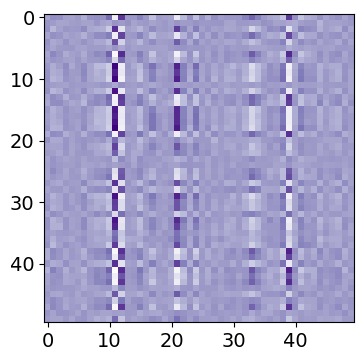

In [13]:
'TinyGPT 3m (l = 8, d = 64, h = 2 ; 3M parameters)'
model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-3M")

layer = 1

Wq = model.transformer.h[layer].attn.attention.q_proj.weight.T.detach().numpy()
Wk = model.transformer.h[layer].attn.attention.k_proj.weight.T.detach().numpy()
M = Wq @ Wk.T

plt.figure(figsize=(4,4))
plt.imshow(M[ : 50, : 50], aspect = 'auto', cmap = 'Purples')
plt.savefig('figures/fig-matrix-decoder-only.pdf', format='pdf', dpi=300)